<a href="https://colab.research.google.com/github/DiegoOCruz/Artificial-Projeto-de-bloco/blob/main/TP1_PB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, minmax_scale
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/heart.csv"
heart_df = pd.read_csv(url)
print(heart_df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [3]:
# Codificar variáveis categóricas
heart_df = pd.get_dummies(heart_df, drop_first=True).astype(int) #corrigido

# Padronizar colunas numéricas
colunas_numericas = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
padronizador = StandardScaler()
heart_df[colunas_numericas] = padronizador.fit_transform(heart_df[colunas_numericas])

print("\nDados após transformação:")
print(heart_df.head())


Dados após transformação:
        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433140   0.410909     0.825070          0  1.382928 -0.727592   
1 -0.478484   1.491752    -0.171961          0  0.754157  0.282891   
2 -1.751359  -0.129513     0.770188          0 -1.525138 -0.727592   
3 -0.584556   0.302825     0.139040          0 -1.132156  0.282891   
4  0.051881   0.951331    -0.034755          0 -0.581981 -0.727592   

   HeartDisease  Sex_M  ChestPainType_ATA  ChestPainType_NAP  \
0             0      1                  1                  0   
1             1      0                  0                  1   
2             0      1                  1                  0   
3             1      0                  0                  0   
4             0      1                  0                  1   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  \
0                 0                  1              0                 0   
1                

In [4]:
X = heart_df.drop(columns=['HeartDisease'])
y = heart_df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#knn = KNeighborsClassifier(n_neighbors=5)
accuracies = []
for i in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia para k={i}: {accuracy * 100:.2f}%")
    accuracies.append(accuracy)


Acurácia para k=1: 83.70%
Acurácia para k=3: 84.78%
Acurácia para k=5: 86.96%
Acurácia para k=7: 86.96%
Acurácia para k=9: 86.41%
Acurácia para k=11: 85.87%
Acurácia para k=13: 85.87%
Acurácia para k=15: 86.41%
Acurácia para k=17: 86.96%
Acurácia para k=19: 86.41%
Acurácia para k=21: 86.41%
Acurácia para k=23: 85.87%
Acurácia para k=25: 85.87%
Acurácia para k=27: 84.78%
Acurácia para k=29: 85.33%
Acurácia para k=31: 84.78%
Acurácia para k=33: 83.70%
Acurácia para k=35: 84.78%
Acurácia para k=37: 84.24%
Acurácia para k=39: 84.24%
Acurácia para k=41: 83.70%
Acurácia para k=43: 83.15%
Acurácia para k=45: 83.70%
Acurácia para k=47: 83.70%
Acurácia para k=49: 83.70%


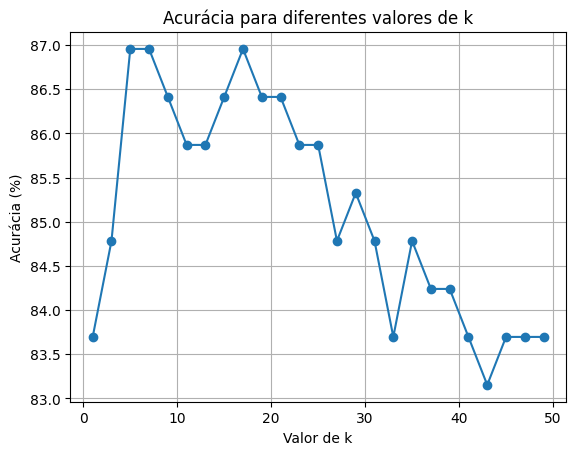

In [5]:
plt.plot(range(1, 50, 2), [a * 100 for a in accuracies], marker='o')
plt.title('Acurácia para diferentes valores de k')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia (%)')
plt.grid()
plt.show()